In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
downsample_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Trimester 3/downsample_df.csv')

Model 7: Generic Random Forest Regressor Model for RFL attenuation

In [ ]:
# Prepare data
X = downsample_data.drop(columns=['FSO_Att', 'RFL_Att'])
y_rfl = downsample_data['RFL_Att']

In [ ]:
X_train_rfl, X_test_rfl, y_train_rfl, y_test_rfl = train_test_split(X, y_rfl, test_size=0.3, random_state=42)

# Initialize RandomForestRegressor
rf_rfl = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True, bootstrap=True)

# Store results
result_rfl1 = []

# Loop to remove the least important feature iteratively
while X_train_rfl.shape[1] > 0:
    # Train the model
    rf_rfl.fit(X_train_rfl, y_train_rfl)
    y_pred_rfl = rf_rfl.predict(X_test_rfl)

    # Calculate RMSE and R2
    rmse_rfl = round(np.sqrt(mean_squared_error(y_test_rfl, y_pred_rfl)), 2)
    r2_rfl = round(r2_score(y_test_rfl, y_pred_rfl), 2)
    oob_score_rfl = round(rf_rfl.oob_score_, 2)

    # Feature Importance
    importances_rfl = rf_rfl.feature_importances_
    indices_rfl = np.argsort(importances_rfl)[::-1]

    # Identify and remove the least important feature
    least_important_feature_rfl = X_train_rfl.columns[indices_rfl[-1]]
    print(f"Removing least important feature: {least_important_feature_rfl}")

    # Store the performance metrics and the least important feature
    result_rfl1.append((len(X_train_rfl.columns), least_important_feature_rfl, rmse_rfl, r2_rfl, oob_score_rfl))

    # Drop the least important feature from the dataset
    X_train_rfl = X_train_rfl.drop(columns=[least_important_feature_rfl])
    X_test_rfl = X_test_rfl.drop(columns=[least_important_feature_rfl])

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(result_rfl1, columns=['Num_Features', 'Least_Important_Feature', 'RMSE', 'R2', 'OOB_Score'])


Removing least important feature: WindSpeedMin
Removing least important feature: WindDirection
Removing least important feature: WindSpeedMax
Removing least important feature: WindSpeed
Removing least important feature: Particulate
Removing least important feature: Time
Removing least important feature: TemperatureDifference
Removing least important feature: ParticulateMin
Removing least important feature: AbsoluteHumidityMin
Removing least important feature: VisibilityMax
Removing least important feature: Frequency
Removing least important feature: RelativeHumidity
Removing least important feature: TemperatureMax
Removing least important feature: Visibility
Removing least important feature: SYNOPCode
Removing least important feature: AbsoluteHumidityMax
Removing least important feature: ParticulateMax
Removing least important feature: TemperatureMin
Removing least important feature: VisibilityMin
Removing least important feature: Temperature
Removing least important feature: RainInten

In [ ]:

# Display the results
print("\nPerformance metrics after each feature removal:")
print(results_df)



Performance metrics after each feature removal:
    Num_Features Least_Important_Feature  RMSE    R2  OOB_Score
0             25            WindSpeedMin  0.90  0.95       0.95
1             24           WindDirection  0.89  0.95       0.95
2             23            WindSpeedMax  0.89  0.95       0.95
3             22               WindSpeed  0.89  0.95       0.95
4             21             Particulate  0.89  0.95       0.95
5             20                    Time  0.89  0.95       0.95
6             19   TemperatureDifference  0.91  0.95       0.94
7             18          ParticulateMin  0.94  0.94       0.94
8             17     AbsoluteHumidityMin  0.94  0.94       0.94
9             16           VisibilityMax  0.93  0.94       0.94
10            15               Frequency  0.93  0.94       0.94
11            14        RelativeHumidity  1.10  0.92       0.92
12            13          TemperatureMax  1.11  0.92       0.91
13            12              Visibility  1.10  0.92   

In [ ]:

# Find the best RMSE and R2
best_rmse = results_df['RMSE'].min()
best_r2 = results_df['R2'].max()

# Select the rows that have the best RMSE and R2
optimal_rmse_rows = results_df[results_df['RMSE'] == best_rmse]
optimal_r2_rows = results_df[results_df['R2'] == best_r2]

# Get the minimum number of features needed for the best RMSE and R2
min_features_rmse = optimal_rmse_rows['Num_Features'].min()
min_features_r2 = optimal_r2_rows['Num_Features'].min()

# Find the overall minimum number of features needed
final_min_features_rfl1 = max(min_features_rmse, min_features_r2)

print(f"\nBest RMSE is: {best_rmse} with minimum features: {min_features_rmse}")
print(f"Best R2 is: {best_r2} with minimum features: {min_features_r2}")
print(f"\nThe overall minimum number of features needed to achieve optimal performance is: {final_min_features_rfl1}")


Best RMSE is: 0.89 with minimum features: 20
Best R2 is: 0.95 with minimum features: 19

The overall minimum number of features needed to achieve optimal performance is: 20


In [ ]:
results_df_rfl1 =  results_df.drop(columns=['Num_Features','OOB_Score'])
results_df_rfl1

,Least_Important_Feature,RMSE,R2
0,WindSpeedMin,0.90,0.95
1,WindDirection,0.89,0.95
2,WindSpeedMax,0.89,0.95
3,WindSpeed,0.89,0.95
4,Particulate,0.89,0.95
5,Time,0.89,0.95
6,TemperatureDifference,0.91,0.95
7,ParticulateMin,0.94,0.94
8,AbsoluteHumidityMin,0.94,0.94
9,VisibilityMax,0.93,0.94


Model 8: Generic Extra Tree Regressor For RSL attenuation

In [ ]:

X_train_rfl, X_test_rfl, y_train_rfl, y_test_rfl = train_test_split(X, y_rfl,
                                              test_size=0.3, random_state=42)

# Initialize Extra Trees Regressor
et_rfl = ExtraTreesRegressor(n_estimators=100, random_state=42, bootstrap=True,
                             oob_score=True)

# Store results
results = []

# Loop to remove least important feature iteratively
# Continue until you have 0 features
for num_features in range(X_train_rfl.shape[1], 0, -1):
    # Train the model
    et_rfl.fit(X_train_rfl, y_train_rfl)
    y_pred_rfl = et_rfl.predict(X_test_rfl)

    # Calculate RMSE and R2
    rmse_rfl = round(np.sqrt(mean_squared_error(y_test_rfl, y_pred_rfl)), 2)
    r2_rfl = round(r2_score(y_test_rfl, y_pred_rfl), 2)
    oob_score_rfl = round(et_rfl.oob_score_, 2)

    # Feature Importance
    importances_rfl = et_rfl.feature_importances_
    indices_rfl = np.argsort(importances_rfl)[::-1]

    # Identify and remove the least important feature
    least_important_feature_rfl = X_train_rfl.columns[indices_rfl[-1]]
    print(f"Removing least important feature: {least_important_feature_rfl}")

    # Store the performance metrics and the least important feature
    results.append((num_features, least_important_feature_rfl, rmse_rfl, r2_rfl,
                    oob_score_rfl))

    # Drop the least important feature from the dataset
    X_train_rfl = X_train_rfl.drop(columns=[least_important_feature_rfl])
    X_test_rfl = X_test_rfl.drop(columns=[least_important_feature_rfl])

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=['Num_Features',
              'Least_Important_Feature', 'RMSE', 'R2', 'OOB_Score'])

# Display the results
print("Performance metrics after each feature removal:")
print(results_df)


Removing least important feature: WindDirection
Removing least important feature: WindSpeedMax
Removing least important feature: WindSpeed
Removing least important feature: WindSpeedMin
Removing least important feature: TemperatureDifference
Removing least important feature: Time
Removing least important feature: RelativeHumidity
Removing least important feature: Visibility
Removing least important feature: Frequency
Removing least important feature: VisibilityMax
Removing least important feature: SYNOPCode
Removing least important feature: VisibilityMin
Removing least important feature: TemperatureMin
Removing least important feature: ParticulateMin
Removing least important feature: Temperature
Removing least important feature: Particulate
Removing least important feature: AbsoluteHumidityMin
Removing least important feature: TemperatureMax
Removing least important feature: ParticulateMax
Removing least important feature: RainIntensityMin
Removing least important feature: AbsoluteHumi

In [ ]:
# Find the best RMSE and R2
best_rmse = results_df['RMSE'].min()
best_r2 = results_df['R2'].max()

# Select the rows that have the best RMSE and R2
optimal_rmse_rows = results_df[results_df['RMSE'] == best_rmse]
optimal_r2_rows = results_df[results_df['R2'] == best_r2]

# Get the minimum number of features needed for the best RMSE and R2
min_features_rmse = optimal_rmse_rows['Num_Features'].min()
min_features_r2 = optimal_r2_rows['Num_Features'].min()

# Find the overall minimum number of features needed
final_min_features_rfl2 = min(min_features_rmse, min_features_r2)

print(f"\nBest RMSE is: {best_rmse} with minimum features: {min_features_rmse}")
print(f"Best R2 is: {best_r2} with minimum features: {min_features_r2}")
print(f"\nThe overall minimum number of features needed to achieve optimal performance is: {final_min_features_rfl2}")


Best RMSE is: 0.8 with minimum features: 22
Best R2 is: 0.96 with minimum features: 20

The overall minimum number of features needed to achieve optimal performance is: 20


In [ ]:
results_df_rfl2 =  results_df.drop(columns=['Num_Features','OOB_Score'])
results_df_rfl2

,Least_Important_Feature,RMSE,R2
0,WindDirection,0.82,0.96
1,WindSpeedMax,0.81,0.96
2,WindSpeed,0.80,0.96
3,WindSpeedMin,0.80,0.96
4,TemperatureDifference,0.81,0.96
5,Time,0.82,0.96
6,RelativeHumidity,0.87,0.95
7,Visibility,0.89,0.95
8,Frequency,0.91,0.95
9,VisibilityMax,1.09,0.92


Plots

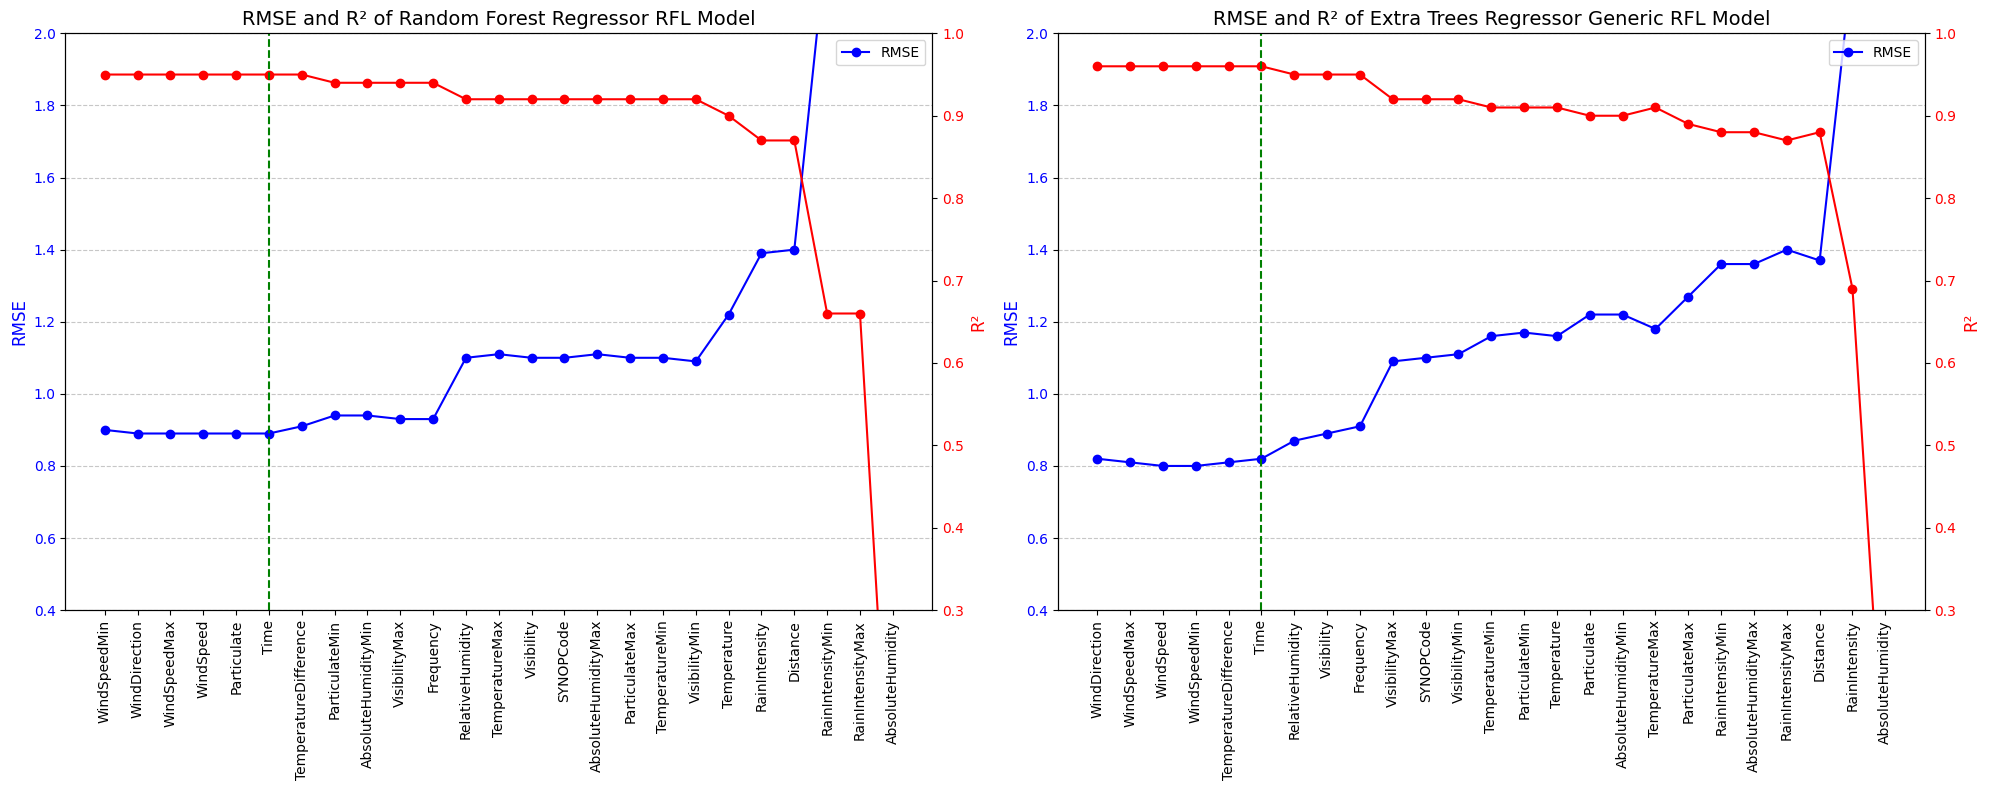

In [ ]:

# Create subplots for Random Forest and Extra Trees Regressors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Random Forest Plot
ax1.plot(results_df_rfl1['Least_Important_Feature'], results_df_rfl1['RMSE'],
         color='blue', marker='o', label='RMSE')
ax1.set_ylabel('RMSE', color='blue', fontsize=12)
ax1.set_ylim(0.4, 2)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a second y-axis for R2 with a shared x-axis
ax2_R2 = ax1.twinx()
ax2_R2.plot(results_df_rfl1['Least_Important_Feature'], results_df_rfl1['R2'],
            color='red', marker='o', label='R²')
ax2_R2.set_ylabel('R²', color='red', fontsize=12)
ax2_R2.set_ylim(0.3, 1)
ax2_R2.tick_params(axis='y', labelcolor='red')

# Add a vertical green line at the optimal number of features for Random Forest
plt.axvline(x= 25-final_min_features_rfl1, color='green', linestyle='--', label='Optimal Features')

# Title for Random Forest Plot
ax1.set_title('RMSE and R² of Random Forest Regressor RFL Model', fontsize=14)

# Extra Trees Plot
ax2.plot(results_df_rfl2['Least_Important_Feature'], results_df_rfl2['RMSE'],
         color='blue', marker='o', label='RMSE')
ax2.set_ylabel('RMSE', color='blue', fontsize=12)
ax2.set_ylim(0.4, 2)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Create a second y-axis for R2 with a shared x-axis
ax2_R2 = ax2.twinx()
ax2_R2.plot(results_df_rfl2['Least_Important_Feature'], results_df_rfl2['R2'],
            color='red', marker='o', label='R²')
ax2_R2.set_ylabel('R²', color='red', fontsize=12)
ax2_R2.set_ylim(0.3, 1)
ax2_R2.tick_params(axis='y', labelcolor='red')

# Add a vertical green line at the optimal number of features for Extra Trees
plt.axvline(x= 25-final_min_features_rfl2, color='green', linestyle='--', label='Optimal Features')

# Title for Extra Trees Plot
ax2.set_title('RMSE and R² of Extra Trees Regressor Generic RFL Model', fontsize=14)

# Rotate x-axis labels to 90 degrees for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha='center')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90, ha='center')

# Add legends
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

# Adjust layout to fit everything
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
# Create a DataFrame with the given data
data = {
    'Model': ['Random Forest Regressor', 'Extra Trees Regressor'],
    'Optimal Features': [20, 20],
    'RMSE': [0.89, 0.82],
    'R2': [0.95, 0.96]
}

results_df = pd.DataFrame(data)

# Display the table
print("Model Performance Comparison:")
print(results_df.to_string(index=False))

Model Performance Comparison:
                  Model  Optimal Features  RMSE   R2
Random Forest Regressor                20  0.89 0.95
  Extra Trees Regressor                20  0.82 0.96


In [ ]:
results_df

,Model,Optimal Features,RMSE,R2
0,Random Forest Regressor,20,0.89,0.95
1,Extra Trees Regressor,20,0.82,0.96


from matplotlib import pyplot as plt
results_df['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['R2'].plot(kind='hist', bins=20, title='R2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='RMSE', y='R2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Optimal Features']
  ys = series['RMSE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('Optimal Features', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Optimal Features')
_ = plt.ylabel('RMSE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Optimal Features']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Optimal Features'}, axis=1)
              .sort_values('Optimal Features', ascending=True))
  xs = counted['Optimal Features']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('Optimal Features', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Optimal Features')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['R2']
  ys = series['RMSE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('R2', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('R2')
_ = plt.ylabel('RMSE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['R2']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'R2'}, axis=1)
              .sort_values('R2', ascending=True))
  xs = counted['R2']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('R2', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('R2')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
results_df['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['R2'].plot(kind='line', figsize=(8, 4), title='R2')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='RMSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='R2', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

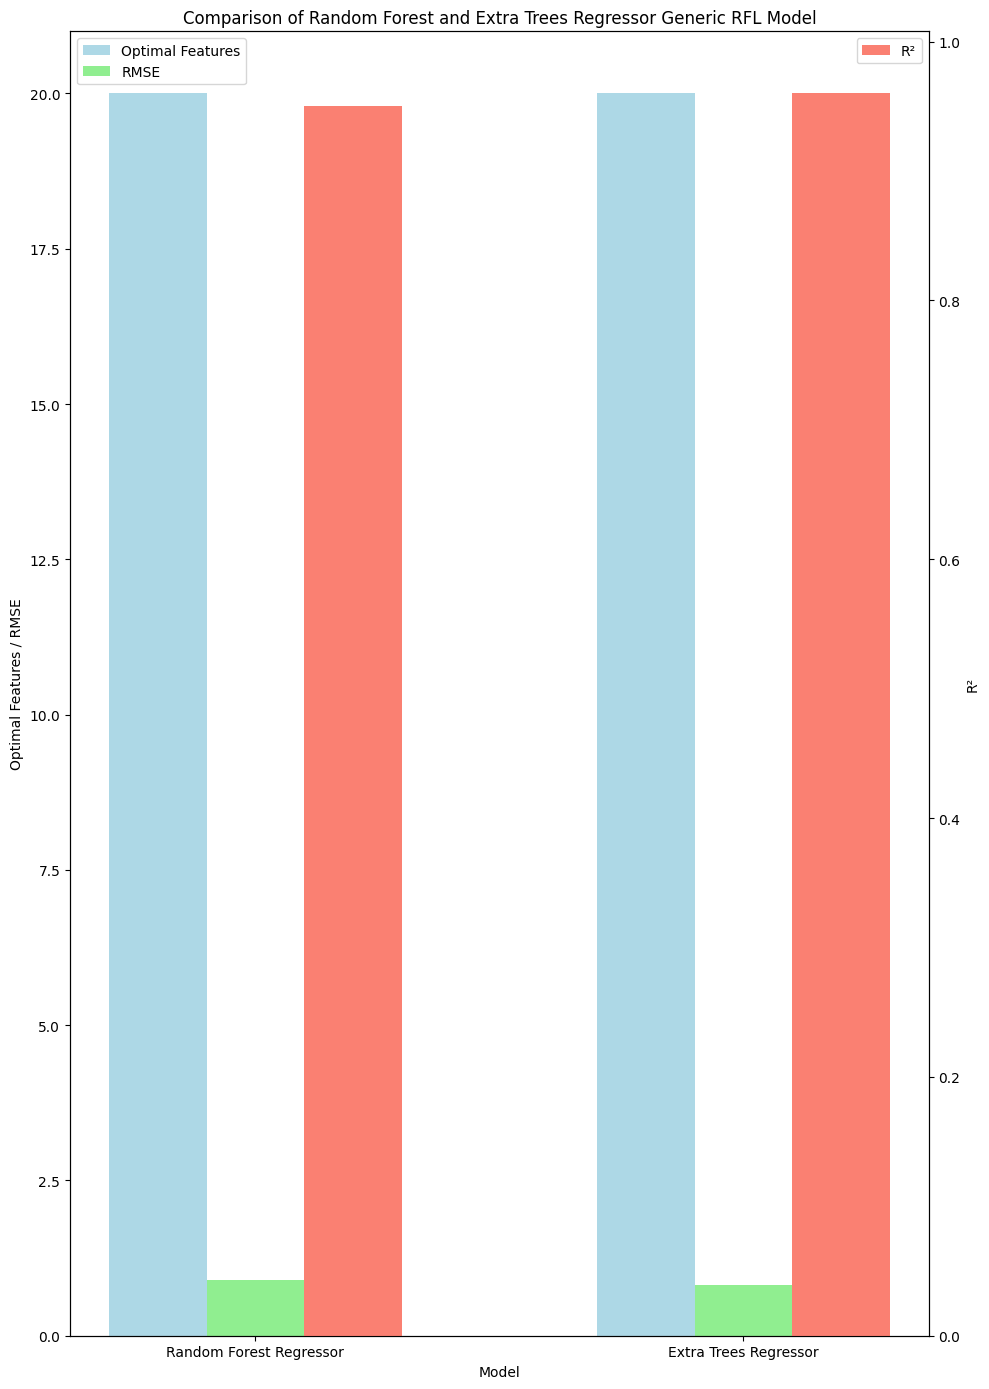

In [ ]:
# Set the position of bars on the x-axis
x = np.arange(len(results_df['Model']))

# Width of the bars
width = 0.2

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 14))

# Create bars for Optimal Features
bar1 = ax1.bar(x - width, results_df['Optimal Features'], width, label='Optimal Features', color='lightblue')

# Create bars for RMSE
bar2 = ax1.bar(x, results_df['RMSE'], width, label='RMSE', color='lightgreen')

# Create a second y-axis for R²
ax2 = ax1.twinx()
bar3 = ax2.bar(x + width, results_df['R2'], width, label='R²', color='salmon')

# Labeling
ax1.set_xlabel('Model')
ax1.set_ylabel('Optimal Features / RMSE', color='black')
ax2.set_ylabel('R²', color='black')
ax1.set_title('Comparison of Random Forest and Extra Trees Regressor Generic RFL Model')
ax1.set_xticks(x)
ax1.set_xticklabels(results_df['Model'])
ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

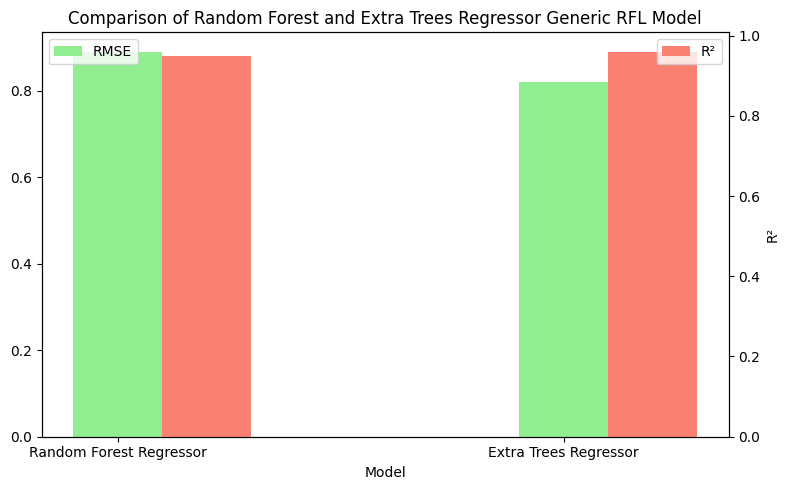

In [ ]:
# Set the position of bars on the x-axis
x = np.arange(len(results_df['Model']))

# Width of the bars
width = 0.2

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(8, 5))

# Create bars for RMSE
bar1 = ax1.bar(x, results_df['RMSE'], width, label='RMSE', color='lightgreen')

# Create a second y-axis for R²
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width, results_df['R2'], width, label='R²', color='salmon')

# Labeling
ax1.set_xlabel('Model')
ax2.set_ylabel('R²', color='black')
ax1.set_title('Comparison of Random Forest and Extra Trees Regressor Generic RFL Model')
ax1.set_xticks(x)
ax1.set_xticklabels(results_df['Model'])
ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

so the Extra trees Regressor is efficent then Random forest regressor.